In [2]:
import pandas as pd
import numpy as np

In [3]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [4]:
print("thông tin của DFake")
fake_df.info()
fake_df.shape

thông tin của DFake
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


(23481, 4)

In [5]:
print("thông tin của DTrue")
true_df.info()
true_df.shape

thông tin của DTrue
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


(21417, 4)

In [6]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_df['label'] = 0
true_df['label'] = 1

In [9]:
data = pd.concat([fake_df, true_df], ignore_index=False)
data = data.sample(frac=1).reset_index(drop=True)
data['content'] = data['title'] + " " + data['text']
data.head()

,title,text,subject,date,label,content
0,Catalan separatist leader turns down chance to...,MADRID (Reuters) - Catalan separatist leader C...,worldnews,"October 25, 2017",1,Catalan separatist leader turns down chance to...
1,Dixie Chicks’ Natalie Maines Unleashes HILARI...,With this presidential election being as absol...,News,"September 21, 2016",0,Dixie Chicks’ Natalie Maines Unleashes HILARI...
2,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",1,"Russia revels in Trump victory, looks to sanct..."
3,U.S. Supreme Court justices fret over offensiv...,WASHINGTON (Reuters) - Supreme Court justices ...,politicsNews,"January 18, 2017",1,U.S. Supreme Court justices fret over offensiv...
4,Women In The World Founder Has The PERFECT De...,This past week was the annual Women in the Wor...,News,"April 9, 2017",0,Women In The World Founder Has The PERFECT De...


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
print("trước khi tiền xử lý:\n", data['content'].head())
data['clean_content'] = data['content'].str.lower()
data['clean_content'] = data['clean_content'].str.replace('[^a-zA-Z]', ' ', regex=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

data['clean_content'] = data['clean_content'].apply(preprocess)
print("sau khi tiền xử lý:\n", data['clean_content'].head())


trước khi tiền xử lý:
 0    Catalan separatist leader turns down chance to...
1     Dixie Chicks’ Natalie Maines Unleashes HILARI...
2    Russia revels in Trump victory, looks to sanct...
3    U.S. Supreme Court justices fret over offensiv...
4     Women In The World Founder Has The PERFECT De...
Name: content, dtype: object
sau khi tiền xử lý:
 0    catalan separatist leader turn chance talk spa...
1    dixie chick natalie maine unleashes hilarious ...
2    russia revel trump victory look sanction relie...
3    u supreme court justice fret offensive tradema...
4    woman world founder perfect description trump ...
Name: clean_content, dtype: object


In [12]:
data.to_csv("cleaned_data.csv", index=False, encoding="utf-8")


In [13]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("cleaned_data.csv")

df_term, df_test = train_test_split(
    df, 
    train_size=0.9, 
    random_state=42,
)

df_test.to_csv("test_data.csv", index=False, encoding="utf-8")
df_term.shape, df_test.shape

((40408, 7), (4490, 7))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
count_matrix = Vectorizer.fit_transform(df_term.clean_content)
print(count_matrix.shape)

(40408, 102938)


In [15]:
X = count_matrix
y = df_term.label

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    train_size=0.8,   
    random_state=42,
)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [17]:
NB_pred = NB.predict(X_valid)
NB_accuracy = accuracy_score(y_valid, NB_pred)
NB_precision = precision_score(y_valid, NB_pred)
NB_f1 = f1_score(y_valid, NB_pred)
NB_recall = recall_score(y_valid, NB_pred)

print(f"Accuracy: {NB_accuracy * 100 :.2f}%")
print(f"Precision: {NB_precision * 100 :.2f}%")
print(f"Recall: {NB_recall * 100 :.2f}%")
print(f"F1-score: {NB_f1 * 100 :.2f}%")

Accuracy: 95.43%
Precision: 95.30%
Recall: 95.22%
F1-score: 95.26%


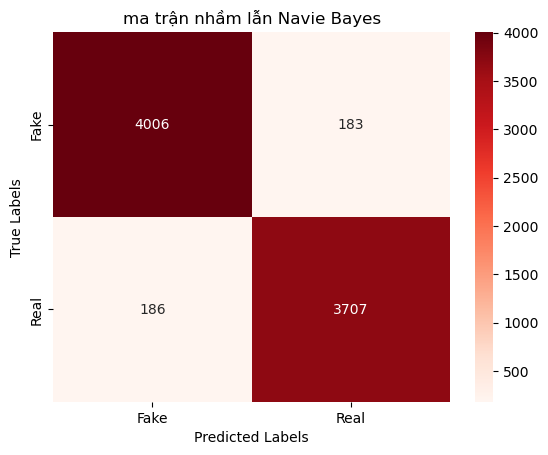

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_valid, NB_pred), annot=True, fmt='d', cmap='Reds', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ma trận nhầm lẫn Navie Bayes')
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
DT_pred = DT.predict(X_valid)
DT_accuracy = accuracy_score(y_valid, DT_pred)
DT_precision = precision_score(y_valid, DT_pred)
DT_f1 = f1_score(y_valid, DT_pred)
DT_recall = recall_score(y_valid, DT_pred)

print(f"Accuracy: {DT_accuracy * 100 :.2f}%")
print(f"Precision: {DT_precision * 100 :.2f}%")
print(f"Recall: {DT_recall * 100 :.2f}%")
print(f"F1-score: {DT_f1 * 100 :.2f}%")

Accuracy: 99.67%
Precision: 99.69%
Recall: 99.61%
F1-score: 99.65%


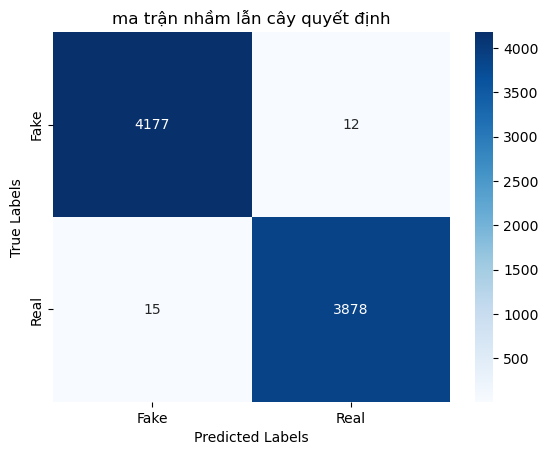

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_valid, DT_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ma trận nhầm lẫn cây quyết định')
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
KNN_pred = KNN.predict(X_valid)
KNN_accuracy = accuracy_score(y_valid, KNN_pred)
KNN_precision = precision_score(y_valid, KNN_pred)
KNN_f1 = f1_score(y_valid, KNN_pred)
KNN_recall = recall_score(y_valid, KNN_pred)

print(f"Accuracy: {KNN_accuracy *100 :.2f}%")
print(f"Precision: {KNN_precision * 100 :.2f}%")
print(f"Recall: {KNN_recall * 100 :.2f}%")
print(f"F1-score: {KNN_f1 * 100 :.2f}%")

Accuracy: 77.83%
Precision: 78.28%
Recall: 74.70%
F1-score: 76.45%


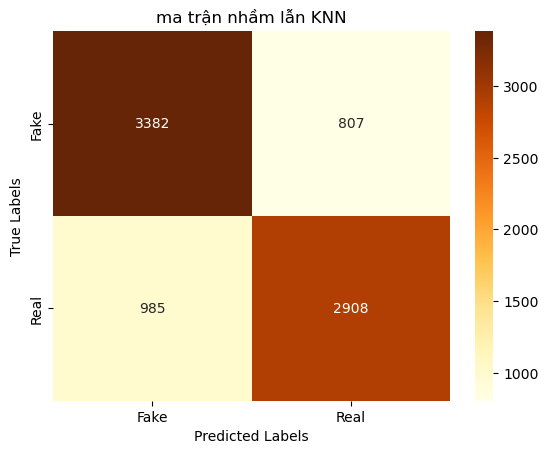

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_valid, KNN_pred), annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ma trận nhầm lẫn KNN')
plt.show()

In [25]:
#bảng so sánh các mô hình
topmodels = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [NB_accuracy, DT_accuracy, KNN_accuracy],
    'Precision': [NB_precision, DT_precision, KNN_precision],
    'Recall': [NB_recall, DT_recall, KNN_recall],
    'F1-score': [NB_f1, DT_f1, KNN_f1]
})
topmodels = topmodels.sort_values(by='Accuracy', ascending=False)
print(topmodels.to_string(index=False))    

              Model  Accuracy  Precision   Recall  F1-score
      Decision Tree  0.996659   0.996915 0.996147  0.996531
        Naive Bayes  0.954343   0.952956 0.952222  0.952589
K-Nearest Neighbors  0.778273   0.782773 0.746982  0.764458


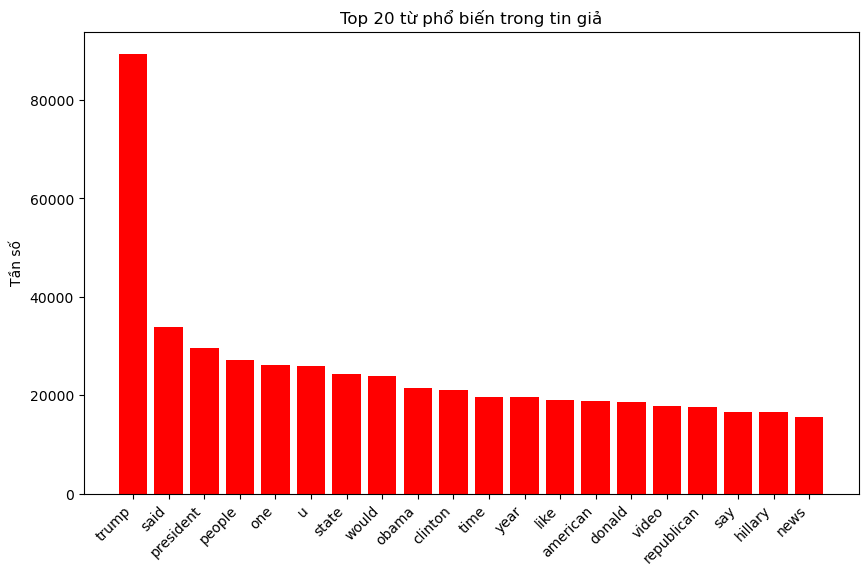

In [26]:
from collections import Counter
fake_words = " ".join(df[df['label'] == 0]['clean_content']).split()
fake_counter = Counter(fake_words)
top_fake = fake_counter.most_common(20)

# top_real already list of tuples [('word1', count1), ('word2', count2), ...]
words_fake = [w for w, c in top_fake]   # x-axis
counts_fake = [c for w, c in top_fake]  # y-axis

plt.figure(figsize=(10,6))
plt.bar(words_fake, counts_fake, color='red')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 từ phổ biến trong tin giả")
plt.ylabel("Tần số")
plt.show()

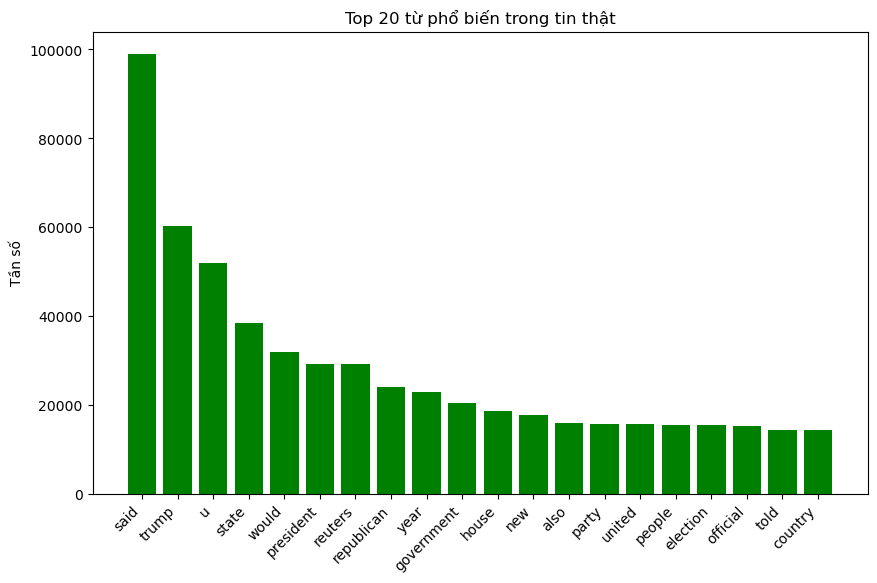

In [27]:
real_words = " ".join(df[df['label'] == 1]['clean_content']).split()
real_counter = Counter(real_words)
top_real = real_counter.most_common(20)

# top_real already list of tuples [('word1', count1), ('word2', count2), ...]
words_real = [w for w, c in top_real]   # x-axis
counts_real = [c for w, c in top_real]  # y-axis

plt.figure(figsize=(10,6))
plt.bar(words_real, counts_real, color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 từ phổ biến trong tin thật")
plt.ylabel("Tần số")
plt.show()

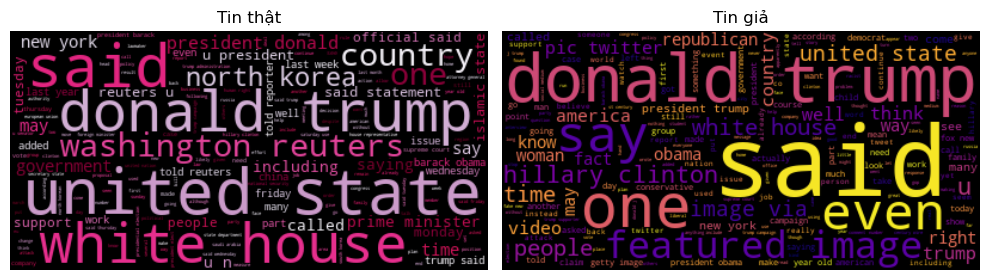

In [31]:
from wordcloud import WordCloud

# Get positive and negative reviews
positive_reviews = df[df['label']==1]['clean_content']
negative_reviews = df[df['label']==0]['clean_content']

# Create word clouds for positive and negative reviews
positive_wordcloud = WordCloud(colormap='PuRd').generate(' '.join(positive_reviews))  
negative_wordcloud = WordCloud(colormap='plasma').generate(' '.join(negative_reviews))


# Plot word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Tin thật')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Tin giả')
plt.axis('off')

plt.tight_layout()
plt.show()

In [32]:
import joblib
joblib.dump(DT, 'Decision_Tree_model.pkl')
joblib.dump(Vectorizer, 'vectorizer.pkl')

from sklearn.pipeline import Pipeline
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
import joblib

pipeline = Pipeline([
    ('vectorizer', Vectorizer),
    ('model', DT)
])

# Đầu vào là text dạng string
initial_type = [('input', StringTensorType([None, 1]))]
onnx_model = convert_sklearn(pipeline, initial_types=initial_type)

with open("text_pipeline.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
